## Marvel Character Image Classification

Given *images of Marvel characters*, let's try to classify which **character** is present in a given image.

We will use pretrained tensorflow/Keras CNN to make our predictions. 

Data Source: https://www.kaggle.com/datasets/hchen13/marvel-heroes

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
image_dir = Path("archive/marvel/marvel")

### Creating File DataFrame

In [6]:
filepaths = list(image_dir.glob(r'**/*.jpg'))

In [7]:
filepaths

[PosixPath('archive/marvel/marvel/valid/doctor strange/pic_322.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_184.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_306.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_247.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_060.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_176.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_165.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_268.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_382.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_073.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_143.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_122.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_126.jpg'),
 PosixPath('archive/marvel/marvel/valid/doctor strange/pic_002.jpg'),
 PosixPath('archive/

In [8]:
Path('archive/marvel/marvel/valid/loki/pic_338.jpg')

PosixPath('archive/marvel/marvel/valid/loki/pic_338.jpg')

In [12]:
os.path.split(os.path.split(Path('archive/marvel/marvel/valid/loki/pic_338.jpg'))[0])[1]

'loki'

In [16]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor strange',
 'doctor str

In [17]:
filepaths = pd.Series(filepaths, name="Filepath").astype(str)
labels = pd.Series(labels, name="Label")

In [18]:
image_df = pd.concat([filepaths, labels], axis=1)
image_df

,Filepath,Label
0,archive/marvel/marvel/valid/doctor strange/pic...,doctor strange
1,archive/marvel/marvel/valid/doctor strange/pic...,doctor strange
2,archive/marvel/marvel/valid/doctor strange/pic...,doctor strange
3,archive/marvel/marvel/valid/doctor strange/pic...,doctor strange
4,archive/marvel/marvel/valid/doctor strange/pic...,doctor strange
...,...,...
3030,archive/marvel/marvel/train/thanos/pic_354.jpg,thanos
3031,archive/marvel/marvel/train/thanos/pic_254.jpg,thanos
3032,archive/marvel/marvel/train/thanos/pic_260.jpg,thanos
3033,archive/marvel/marvel/train/thanos/pic_381.jpg,thanos


In [19]:
image_df['Label'].value_counts()

Label
doctor strange     406
spider-man         383
captain america    381
thanos             378
hulk               377
black widow        375
ironman            374
loki               361
Name: count, dtype: int64

In [20]:
image_df['Label'].unique()

array(['doctor strange', 'black widow', 'loki', 'ironman', 'hulk',
       'spider-man', 'captain america', 'thanos'], dtype=object)

In [22]:
image_df.query("Label == 'thanos'")

,Filepath,Label
396,archive/marvel/marvel/valid/thanos/pic_151.jpg,thanos
397,archive/marvel/marvel/valid/thanos/pic_305.jpg,thanos
398,archive/marvel/marvel/valid/thanos/pic_284.jpg,thanos
399,archive/marvel/marvel/valid/thanos/pic_311.jpg,thanos
400,archive/marvel/marvel/valid/thanos/pic_252.jpg,thanos
...,...,...
3030,archive/marvel/marvel/train/thanos/pic_354.jpg,thanos
3031,archive/marvel/marvel/train/thanos/pic_254.jpg,thanos
3032,archive/marvel/marvel/train/thanos/pic_260.jpg,thanos
3033,archive/marvel/marvel/train/thanos/pic_381.jpg,thanos


In [23]:
samples = []
for category in image_df['Label'].unique():
    category_slice = image_df.query("Label == @category")
    samples.append(category_slice.sample(200, random_state=1))

In [24]:
samples

[                                              Filepath           Label
 752  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 452  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 711  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 482  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 536  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 ..                                                 ...             ...
 632  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 646  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 498  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 740  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 559  archive/marvel/marvel/train/doctor strange/pic...  doctor strange
 
 [200 rows x 2 columns],
                                                Filepath        Label
 808   archive/marvel/marvel/train/blac

In [26]:
image_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [27]:
image_df['Label'].value_counts()

Label
doctor strange     200
captain america    200
loki               200
thanos             200
spider-man         200
black widow        200
hulk               200
ironman            200
Name: count, dtype: int64

In [28]:
image_df

,Filepath,Label
0,archive/marvel/marvel/train/doctor strange/pic...,doctor strange
1,archive/marvel/marvel/train/captain america/pi...,captain america
2,archive/marvel/marvel/train/loki/pic_296.jpg,loki
3,archive/marvel/marvel/valid/captain america/pi...,captain america
4,archive/marvel/marvel/train/thanos/pic_069.jpg,thanos
...,...,...
1595,archive/marvel/marvel/train/ironman/pic_102.jpg,ironman
1596,archive/marvel/marvel/train/hulk/pic_215.jpg,hulk
1597,archive/marvel/marvel/train/spider-man/pic_059...,spider-man
1598,archive/marvel/marvel/train/black widow/pic_04...,black widow


### Loading Image Data

In [29]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [31]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [32]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="training"
)

val_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="validation"
)

test_images = test_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size=32,
    shuffle=False
)

Found 896 validated image filenames belonging to 8 classes.
Found 224 validated image filenames belonging to 8 classes.
Found 480 validated image filenames belonging to 8 classes.


### Training

In [34]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [35]:
pretrained_model.trainable = False
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [37]:
train_images.labels

[4,
 1,
 2,
 7,
 2,
 4,
 3,
 1,
 6,
 0,
 0,
 2,
 2,
 3,
 1,
 1,
 5,
 3,
 2,
 2,
 2,
 3,
 6,
 0,
 4,
 2,
 7,
 5,
 0,
 0,
 6,
 5,
 5,
 3,
 1,
 0,
 6,
 5,
 4,
 4,
 6,
 1,
 5,
 6,
 6,
 0,
 3,
 0,
 0,
 2,
 4,
 5,
 0,
 7,
 0,
 1,
 5,
 5,
 3,
 2,
 5,
 3,
 3,
 6,
 4,
 5,
 4,
 1,
 4,
 0,
 2,
 6,
 1,
 5,
 6,
 7,
 6,
 2,
 3,
 4,
 0,
 7,
 1,
 4,
 4,
 0,
 7,
 0,
 6,
 7,
 2,
 4,
 3,
 4,
 5,
 7,
 0,
 2,
 2,
 2,
 0,
 4,
 4,
 3,
 7,
 1,
 3,
 0,
 0,
 2,
 7,
 6,
 2,
 7,
 3,
 2,
 3,
 2,
 6,
 1,
 7,
 6,
 3,
 4,
 0,
 6,
 7,
 6,
 6,
 4,
 0,
 1,
 5,
 0,
 2,
 3,
 0,
 0,
 5,
 6,
 1,
 5,
 1,
 4,
 1,
 2,
 0,
 5,
 6,
 2,
 5,
 5,
 4,
 3,
 1,
 0,
 7,
 2,
 3,
 4,
 2,
 7,
 2,
 7,
 7,
 5,
 7,
 6,
 7,
 2,
 5,
 3,
 5,
 7,
 0,
 6,
 3,
 5,
 5,
 1,
 7,
 4,
 3,
 5,
 3,
 5,
 5,
 5,
 6,
 2,
 0,
 2,
 2,
 4,
 3,
 6,
 7,
 6,
 2,
 2,
 2,
 5,
 4,
 0,
 3,
 1,
 7,
 1,
 0,
 7,
 2,
 4,
 5,
 0,
 0,
 2,
 0,
 6,
 3,
 0,
 7,
 6,
 4,
 1,
 0,
 0,
 2,
 3,
 3,
 5,
 1,
 6,
 2,
 3,
 6,
 5,
 6,
 7,
 0,
 4,
 7,
 7,
 4,
 2,
 5,
 0,
 4,
 7,
 2,
 0,


In [38]:
train_images.next()[1]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 

In [39]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


2025-01-18 11:37:51.624884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - ETA: 0s - loss: 1.8382 - accuracy: 0.3326

2025-01-18 11:39:58.484143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


28/28 [==============================] - 169s 6s/step - loss: 1.8382 - accuracy: 0.3326 - val_loss: 1.5806 - val_accuracy: 0.4598
Epoch 2/100
28/28 [==============================] - 147s 5s/step - loss: 1.1353 - accuracy: 0.6172 - val_loss: 1.4186 - val_accuracy: 0.5491
Epoch 3/100
28/28 [==============================] - 151s 5s/step - loss: 0.8199 - accuracy: 0.7467 - val_loss: 1.3826 - val_accuracy: 0.5402
Epoch 4/100
28/28 [==============================] - 149s 5s/step - loss: 0.5629 - accuracy: 0.8449 - val_loss: 1.4671 - val_accuracy: 0.5312
Epoch 5/100
28/28 [==============================] - 157s 6s/step - loss: 0.3937 - accuracy: 0.9029 - val_loss: 1.5332 - val_accuracy: 0.5402
Epoch 6/100
28/28 [==============================] - 157s 6s/step - loss: 0.2413 - accuracy: 0.9554 - val_loss: 1.6042 - val_accuracy: 0.5357


### Results

In [42]:
list(test_images.class_indices.keys())

['black widow',
 'captain america',
 'doctor strange',
 'hulk',
 'ironman',
 'loki',
 'spider-man',
 'thanos']

2025-01-18 12:14:41.742217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-01-18 12:16:04.039127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 62s 4s/step
Test Accuracy: 56.25%


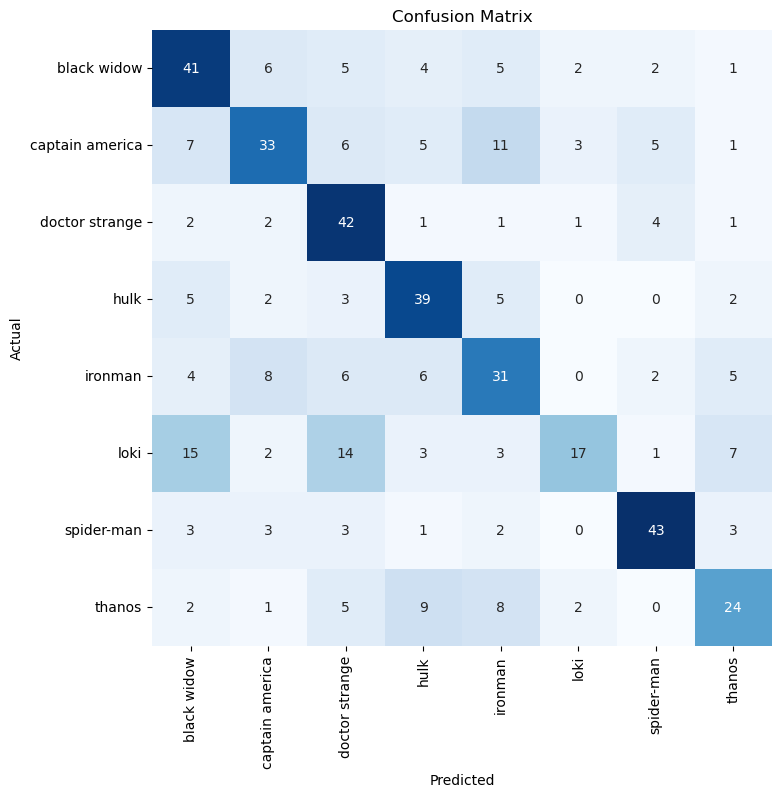

Classification Report:
---------------------------
                  precision    recall  f1-score   support

    black widow       0.52      0.62      0.57        66
captain america       0.58      0.46      0.52        71
 doctor strange       0.50      0.78      0.61        54
           hulk       0.57      0.70      0.63        56
        ironman       0.47      0.50      0.48        62
           loki       0.68      0.27      0.39        62
     spider-man       0.75      0.74      0.75        58
         thanos       0.55      0.47      0.51        51

       accuracy                           0.56       480
      macro avg       0.58      0.57      0.56       480
   weighted avg       0.58      0.56      0.55       480



In [45]:
results = model.evaluate(test_images, verbose=0)
predictions = np.argmax(model.predict(test_images), axis=1)

class_names = list(test_images.class_indices.keys())

cm = confusion_matrix(test_images.labels, predictions, labels=np.arange(8))
clr = classification_report(test_images.labels, predictions, labels=np.arange(8), target_names=class_names)

print("Test Accuracy: {:.2f}%".format(results[1]*100))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap="Blues", cbar=False)
plt.xticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n---------------------------\n", clr)